Question 1:

The standard deviation (SD) is given by:

$$ SD = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2} $$

The standard error of the mean (SEM) is given by:

$$ SEM = \frac{SD}{\sqrt{n}} $$

What is the difference between the "standard error of the mean" and the "standard deviation" of the original data?
What distinct ideas do each of these capture?

Standard deviation measures the disperson of datas in one population. SD calculates the different between the data in population and mean. It only focus on one population. 
Standard error of the mean compares the difference between the mean of two set of data. It focus on two samples. When SED is small, it means the difference between mean in two population is precise. When SEM is large, it there is a big change between means in two population. 
To calculate Standard error of the mean, we need to firstly find SD.

Here's a summary of what we've discussed:

1. Standard Deviation (SD):
Definition: SD measures the spread or variability of individual data points within a single dataset around its mean.
Purpose: It shows how spread out or consistent the values are within a population or sample.
Key idea: SD captures how much the values deviate from the mean within one group.
2. Standard Error of the Difference (SED):
Definition: SED measures the variability or uncertainty in the difference between the means of two independent samples.
Purpose: It helps assess whether the difference between two group means is statistically significant or just due to random variability (sampling error).
Key idea: SED captures the reliability of the difference between the means of two groups, indicating whether that difference is likely to be meaningful.
Key Distinctions:
SD looks at the variability within a single group.
SED looks at the variability between the means of two groups.
In summary, SD is about individual data points relative to the mean in one group, while SED is about comparing two groups' means and assessing the uncertainty in that comparison.
https://chatgpt.com/share/66ff359b-1694-8003-b680-a67cd548258f

Question 6:

What is the process of bootstrapping?
The process of bootstrapping is you randomly samples your datas with replacement for hundreds or thousands of times, and eventually formed a discrete data set on the graph. The discrete data set on the graph is the population.

What is the main purpose of bootstrapping?
The main purpose of bootstrapping is to get more samples without performing actual experiments. Further, we can use the population to find SD and SED.

If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
After doing the bootstrapping, we can find out the discrete data of the population on graph. Then, we use the SD formula to find SD and use SED formula to find the difference my guess and the real mean. Check if zero falls into the 95% confidence interval. If CI contains 0, accept null hypothesis. Reject null hypothesis otherwise.

Here’s a summary of our discussion:

Bootstrapping:

Statistics: A resampling method to estimate the distribution of a statistic by repeatedly drawing samples from a dataset with replacement. It helps assess the accuracy of sample estimates.
Computing: A self-starting process where a small program (bootloader) initializes the system and loads the operating system when a computer is powered on.
Business: A self-funding method where a business is started and grown using personal savings or operational income without external investment.
Finding the Mean Using Standard Deviation:

The standard deviation (SD) formula does not allow for the direct calculation of the mean (μ) since the mean is used in the SD formula. The standard deviation measures the dispersion of data points around the mean.
To find the mean, you can calculate it directly from the dataset using the formula: 
𝜇=∑𝑥𝑖/𝑁, where 𝑥𝑖 represents the data points and 𝑁 is the number of points.
In essence, the mean cannot be derived from the SD formula alone without having the original data points.
https://chatgpt.com/share/66ff3f9f-d470-8003-a95e-3b4c0ca61ee4

question 8:

Problem Introduction:
AliTech invented a new vaccine and its goal is to improve a better health for individuals. To test the effective of the vaccines. We compares the initial Health Score of patients and final health score of patients. Then, we evalute the difference in health scores.

Explanation of "no effect" null hypothesis:
Null hypothesis means that vaccine has no effect on health outcomes, which means the mean of final health score is equal to initial health score. If there is significant difference between the mean in intial health score and the mean in final health score, then we reject the null hypothesis. This means the vaccine is effective on health outcomes.

Data Visualization: 
Data Visualization can help us to understand the comparison between initial health score and final health score.

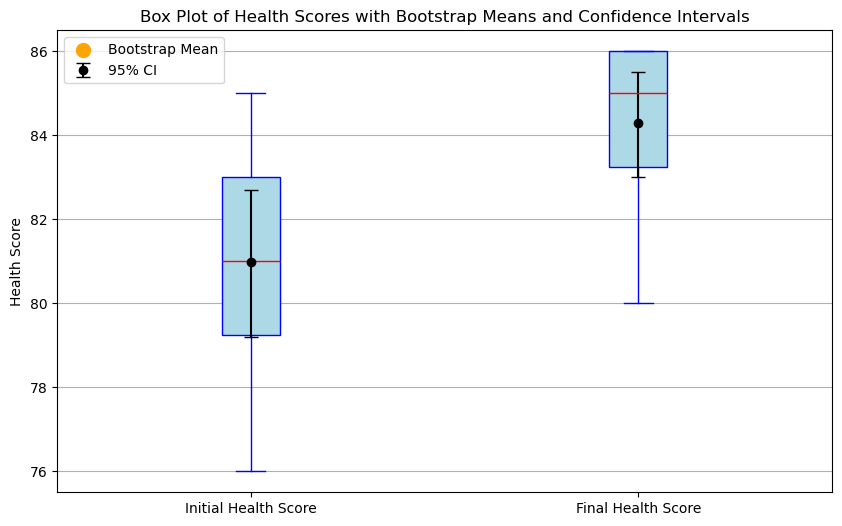

In [2]:
!pip install pandas numpy matplotlib

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating a DataFrame from the provided data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Function to perform bootstrapping
def bootstrap(data, n_samples):
    """ Perform bootstrapping to estimate the distribution of the mean. """
    means = []
    n = len(data)
    for _ in range(n_samples):
        sample = np.random.choice(data, size=n, replace=True)
        means.append(np.mean(sample))
    return means

# Number of bootstrap samples
n_bootstrap_samples = 1000

# Bootstrap for Initial and Final Health Scores
bootstrap_initial_means = bootstrap(df['InitialHealthScore'], n_bootstrap_samples)
bootstrap_final_means = bootstrap(df['FinalHealthScore'], n_bootstrap_samples)

# Calculate confidence intervals for both initial and final health scores
def confidence_interval(data, confidence_level=0.95):
    """ Calculate the confidence interval for a dataset. """
    lower_bound = np.percentile(data, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(data, (1 + confidence_level) / 2 * 100)
    return lower_bound, upper_bound

# Confidence intervals for initial and final health scores
ci_initial = confidence_interval(bootstrap_initial_means)
ci_final = confidence_interval(bootstrap_final_means)

# Prepare data for box plot
scores_data = [df['InitialHealthScore'], df['FinalHealthScore']]
labels = ['Initial Health Score', 'Final Health Score']

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(scores_data, labels=labels, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'), 
            medianprops=dict(color='red'), 
            whiskerprops=dict(color='blue'), 
            capprops=dict(color='blue'))

# Add bootstrap means and confidence intervals
for i, (mean, ci) in enumerate(zip(
        [np.mean(bootstrap_initial_means), np.mean(bootstrap_final_means)],
        [ci_initial, ci_final]
)):
    plt.scatter(i + 1, mean, color='orange', s=100, label='Bootstrap Mean' if i == 0 else "")
    plt.errorbar(i + 1, mean, yerr=[[mean - ci[0]], [ci[1] - mean]], fmt='o', color='black', capsize=5, label='95% CI' if i == 0 else "")

# Customize the plot
plt.title('Box Plot of Health Scores with Bootstrap Means and Confidence Intervals')
plt.ylabel('Health Score')
plt.legend()
plt.grid(axis='y')
plt.show()

The box plot shows the distributions of initial health score and final health score, it plots the median point and the mean of two dataset. It shows the change (difference) between intial and final health score. From the graph, we can see the red line of initial health score is not in the 95% IC of the final Health Score. Therefore, the mean of graph 1 does not equal to the mean of the graph 2. 

Quantitative Analysis

Methodology Code and Explanations:
1) calculate mean and SD for two health score
2) use bootstapping to calculate the interval of final health score

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats

# Creating a DataFrame from the provided data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# 1. Calculate means
mean_initial = df['InitialHealthScore'].mean()
mean_final = df['FinalHealthScore'].mean()

# 2. Bootstrapping to calculate confidence intervals for Final Health Score
def bootstrap(data, n_iterations=1000):
    means = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(sample.mean())
    return means

# Perform bootstrapping on the Final Health Score
bootstrap_final_means = bootstrap(df['FinalHealthScore'])

# Calculate 95% CI from bootstrap means
def calculate_ci(data, confidence_level=0.95):
    lower_bound = np.percentile(data, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(data, (confidence_level + (1 - confidence_level) / 2) * 100)
    return (lower_bound, upper_bound)

ci_final = calculate_ci(bootstrap_final_means)

# Print results
print("Mean Initial Health Score:", mean_initial)
print("Mean Final Health Score:", mean_final)
print("95% CI for Final Health Score:", ci_final)

# 3. Check if Mean Initial Health Score is within the CI of Final Health Score
is_within_ci = ci_final[0] <= mean_initial <= ci_final[1]
print("Is the Mean Initial Health Score within the 95% CI of Final Health Score?", is_within_ci)

Mean Initial Health Score: 81.0
Mean Final Health Score: 84.3
95% CI for Final Health Score: (82.9, 85.4)
Is the Mean Initial Health Score within the 95% CI of Final Health Score? False


Summary of Discussion
Data Overview:

The dataset consists of health scores for 10 patients, including their Initial Health Scores and Final Health Scores after receiving a vaccine.
Statistical Analysis:

We discussed how to compute the Standard Deviation (SD) for both Initial and Final Health Scores using formulas for population SD. However, execution of the actual calculations was not possible at that time.
Bootstrapping:

We introduced the concept of bootstrapping to generate estimates for the means and confidence intervals (CIs) of the Initial and Final Health Scores. This involved resampling the data and calculating means over many iterations.
We also mentioned how to estimate the 95% confidence intervals for both health scores, which help understand the variability and reliability of the means.
Box Plot Visualization:

We discussed creating a box plot to visualize the Initial and Final Health Scores, showcasing their distributions, central tendencies, and spread.
The box plot elements (like the median, quartiles, whiskers, and outliers) were explained, emphasizing how they represent data variability.
Estimating Confidence Intervals from the Box Plot:

We touched on how to interpret the box plot and derive rough estimates for SD based on the interquartile range (IQR).
Checking for Overlap:

We explored how to check if the mean of the Initial Health Score falls within the 95% confidence interval of the Final Health Score. This involves comparing the mean value to the lower and upper bounds of the CI.
Practical Application:

Finally, code snippets were provided for calculating means, confidence intervals, and for plotting the data in a Jupyter Notebook environment.
https://chatgpt.com/share/66ff4cd9-82a8-8003-b36a-b1250400a33f

Supportng visualizations

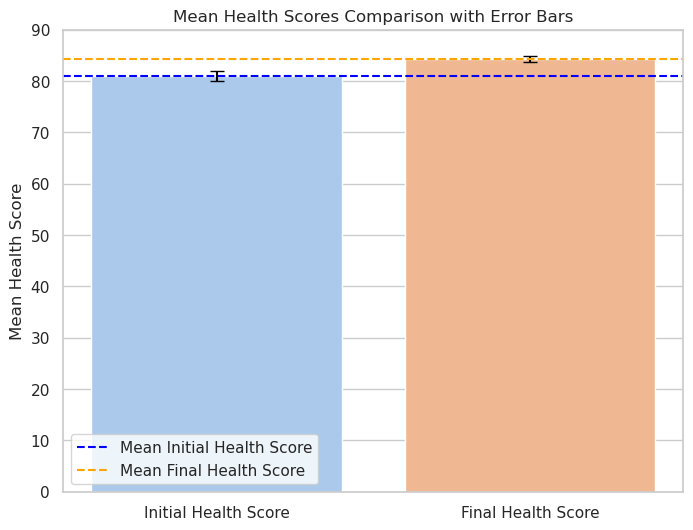

In [12]:
# Bar Plot for Mean Comparison with Error Bars
plt.figure(figsize=(8, 6))

# Means of Initial and Final Health Scores
mean_scores = [mean_initial, mean_final]

# Standard errors of the means (SEM)
errors = [
    df['InitialHealthScore'].std() / np.sqrt(len(df)), 
    df['FinalHealthScore'].std() / np.sqrt(len(df))
]

# Bar plot with error bars, using x as hue
sns.barplot(x=['Initial Health Score', 'Final Health Score'], 
            y=mean_scores, 
            hue=['Initial Health Score', 'Final Health Score'], 
            palette='pastel', 
            dodge=False, 
            legend=False)

# Error bars
plt.errorbar(x=[0, 1], y=mean_scores, yerr=errors, fmt='none', c='black', capsize=5)

# Set plot labels and title
plt.ylim(0, 90)
plt.title('Mean Health Scores Comparison with Error Bars')
plt.ylabel('Mean Health Score')

# Add horizontal lines showing the mean values
plt.axhline(y=mean_initial, color='blue', linestyle='--', label='Mean Initial Health Score')
plt.axhline(y=mean_final, color='orange', linestyle='--', label='Mean Final Health Score')

# Display legend
plt.legend()

# Show the plot
plt.show()


Findings and discussions:

From the graph, the mean of final health score is higher than the mean of intial health score. Therefore the hypothesis is False. The Mean Initial Health Score is not in 95% CI of Final Health Score. There is a significant difference between the mean in intial health score and the mean in final health score. The new vaccine has a positive effect.

Conclusion of 'no effect' Null hypothesis:
From the data analysing, we reject the Null hypothesis. The new vaccine has a positive effect.

Further considerations:

1) use a greater sample size, such as we have 100 data in one sample.
2) study for the long term effect of the vaccine.
3) use additional variables, such as sex and age to determine the effect of the new vaccine.